# Classification Model for Wine Recognition dataset

Rocio Tantos

This Jupyter Notebook has an example of a classification model for the Wine Recognition dataset using random forest algorithm.

https://scikit-learn.org/stable/datasets/toy_dataset.html

As my first approach to Machine Learning, this is a simple exercise aimed at practicing supervised learning.

I found the Data Professor YouTube channel very helpful for this activity, especially the videos "Machine Learning in Python: Building a Classification Model" and "Hyperparameter Tuning of Machine Learning Model in Python". Link below:

https://www.youtube.com/watch?v=XmSlFPDjKdc&list=PLtqF5YXg7GLltQSLKSTnwCcHqTZASedbO&index=1l

https://www.youtube.com/watch?v=jUxhUgkKAjE&t=988s

### 1. Import Libraries

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import plotly.graph_objects as go
import pandas as pd

### 2. Load Wine Recognition dataset

In [24]:
wine = datasets.load_wine()

Taking a look to the dataset

In [26]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### 3. Dataset Content

The Wine Recognition dataset contains 13 input features and 1 output variable

### 3.1. Input Features

In [28]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### 3.2. Output Features

In [30]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


### 4. Taking a look to the input features

In [32]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### 5. Taking a look to the output features

In [34]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### 6. Assigning input and output variables

In [36]:
X = wine.data
Y = wine.target

### 6.1 Data dimensions

In [38]:
X.shape

(178, 13)

In [40]:
Y.shape

(178,)

### 7. Building the classification model

In [54]:
#Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
X_test.shape, Y_test.shape

((36, 13), (36,))

In [58]:
X_train.shape, Y_train.shape

((142, 13), (142,))

In [60]:
clf = RandomForestClassifier()

In [62]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

### 8. Model Performance

In [64]:
clf.score(X_test, Y_test)

0.9722222222222222

### 9. Perfoms prediction on the test set

In [66]:
Y_pred = clf.predict(X_test)

In [68]:
accuracy_score(Y_pred, Y_test)

0.9722222222222222

#### 9.1 Comparison between prediction and real output 

In [70]:
Y_pred, Y_test

(array([2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2]),
 array([2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2]))

## 10. Hyperparameter Tuning

In this case, I want to know if there is a way to improve the model's performance using hyperparameters, even though the current model performance is already quite good.

By default, RandomForestClassifier() uses n_estimators=100 and max_features='sqrt' for integer values. Therefore, I want to modify these default values using GridSearchCV. This technique performs an exhaustive search over specified parameter values for an estimator, such as n_estimators and max_features.

n_estimators: The number of trees in the forest.
max_features: The number of features to consider when looking for the best split.

In [101]:
max_features_range = np.arange(1,14,1) 
n_estimators_range = np.arange(10,210,10) 
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier(random_state=42) #Random state for reproducibility of results across executions

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [103]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [105]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 2, 'n_estimators': 50} with a score of 0.99


In [107]:
print(grid.best_estimator_.score(X_test, Y_test))

0.9722222222222222


## 11. Grid search parameters accuracy scores 

We can export the grid search parameters and their accuracy scores by using a dataframe

In [109]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results

,max_features,n_estimators,Accuracy
0,1,10,0.958128
1,1,20,0.965271
2,1,30,0.979064
3,1,40,0.985961
4,1,50,0.985961
...,...,...,...
255,13,160,0.958128
256,13,170,0.958128
257,13,180,0.958128
258,13,190,0.958128


## 12. Preparing data for making contour plots

In order to create meaningful contour plots or 3D plots, the data needs to be reshaped into a grid structure

In [113]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.958128
             20            0.965271
             30            0.979064
             40            0.985961
             50            0.985961
...                             ...
13           160           0.958128
             170           0.958128
             180           0.958128
             190           0.958128
             200           0.958128

[260 rows x 1 columns]

In [115]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot(index='max_features', columns='n_estimators', values='Accuracy')
grid_pivot

n_estimators,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
max_features,,,,,,,,,,,,,,,,,,,,
1,0.958128,0.965271,0.979064,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961
2,0.971921,0.971921,0.985714,0.985714,0.992857,0.985714,0.985714,0.979064,0.979064,0.985961,0.992857,0.985961,0.985961,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064
3,0.971921,0.971921,0.979310,0.972167,0.979064,0.985961,0.985961,0.979064,0.985961,0.979064,0.979064,0.979064,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.979064,0.985961
4,0.957882,0.978818,0.971675,0.971675,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961,0.985961
5,0.943842,0.965271,0.986207,0.972167,0.972167,0.972167,0.972167,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064
6,0.971921,0.965025,0.971921,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.972167,0.979064,0.979064,0.979064,0.979064,0.972167,0.979064,0.979064,0.979064,0.972167
7,0.950985,0.965271,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.972167,0.972167,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.979064,0.972167,0.972167
8,0.929557,0.943596,0.950985,0.958128,0.965271,0.965271,0.958128,0.965271,0.965025,0.965025,0.965025,0.972167,0.972167,0.972167,0.972167,0.972167,0.972167,0.972167,0.972167,0.972167
9,0.957882,0.957882,0.965025,0.965025,0.965025,0.958128,0.965025,0.965025,0.965025,0.965025,0.965025,0.958128,0.958128,0.965025,0.965025,0.972167,0.972167,0.972167,0.972167,0.972167


In [117]:
x = grid_pivot.columns.values  
y = grid_pivot.index.values
z = grid_pivot.values 

## 13. 2D Contour Plot

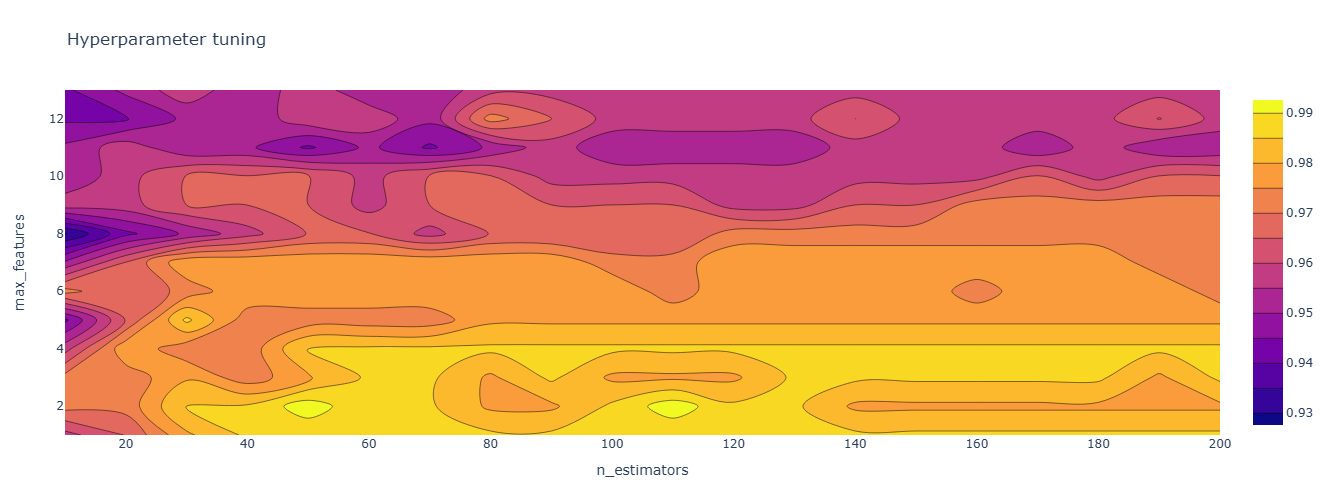

In [120]:
# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

## 14. 3D Surface Plot

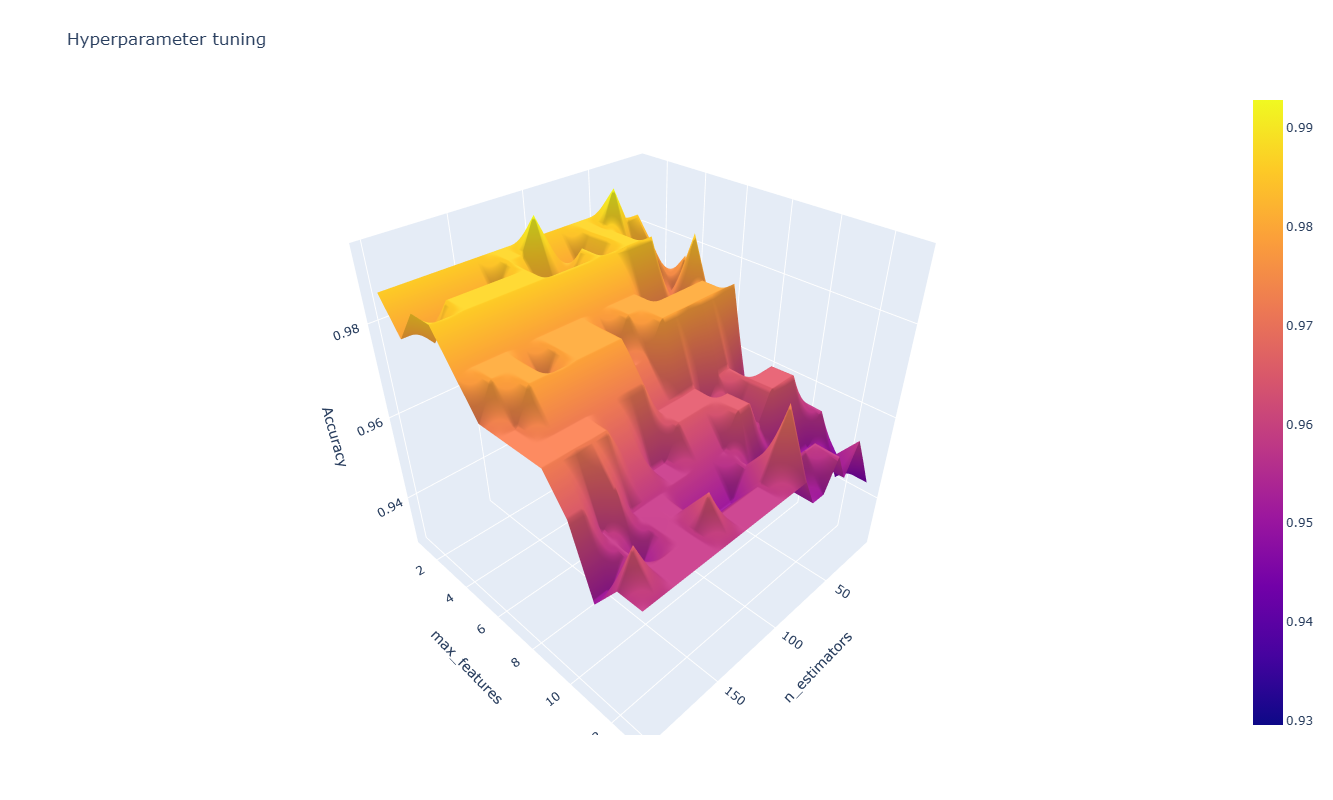

In [123]:
fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

To summarize, after searching for the best parameters with GridSearchCV(), we found that the optimal parameters were max_features: 2 and n_estimators: 50, with a cross-validation score of 0.99. However, when we evaluate the model using the test dataset, we observe that the score decreases. This suggests that even though the model's performance was improved during the parameter search, the overall performance on unseen data (test set) is not significantly different from the default model's performance.
